## Pregunta 6

### Sustentación
Para este problema se hará uso del algoritmo Floyd Warshall por los motivos siguientes:

- El problema pide hallar el camino mas corto para todos los PARES de parada. El algopritmo mencionado esta diseñado precisamente para resolver problemas como ese (all-pairs-shortest-path)
- Al ser un algoritmo Dinámico, incluye y analiza todas las paradas. Algo que los otros (Dijkstra o A*) no hacen.
- Y por ultimo, el problema no nos da aristas con peso negativo. Por lo tanto, descarto el algoritmo de Bellman Ford.

## Codigo

In [ ]:
num_paradas = 6

# Inicializar la matriz de distancias con infinito como valores iniciales (todos menos la diagonal)
distancias = [[float('inf')] * num_paradas for _ in range(num_paradas)]
for i in range(num_paradas):
    distancias[i][i] = 0

conexiones = { # -> conexiones dadas en el problema
    (0, 1): 10, (0, 2): 15, (1, 2): 5, (1, 3): 20, (2, 3): 10,
    (3, 4): 10, (4, 5): 5, (2, 5): 30, (0, 5): 100, (1, 4): 50
}


for (origen, destino), distancia in conexiones.items():
  # Rutas bidireccionales
    distancias[origen][destino] = distancia
    distancias[destino][origen] = distancia


# Floyd Warshall
for k in range(num_paradas):
    for i in range(num_paradas):
        for j in range(num_paradas):
            distancias[i][j] = min(distancias[i][j], distancias[i][k] + distancias[k][j])

print("Matriz de distancias más cortas para todas las paradas:")
for fila in distancias:
    print(fila)

Matriz de distancias más cortas para todas las paradas:
[0, 10, 15, 25, 35, 40]
[10, 0, 5, 15, 25, 30]
[15, 5, 0, 10, 20, 25]
[25, 15, 10, 0, 10, 15]
[35, 25, 20, 10, 0, 5]
[40, 30, 25, 15, 5, 0]


## Dibujo del Grafo
Aqui se hizo uso de la IA Gemini

In [ ]:
!pip install networkx matplotlib

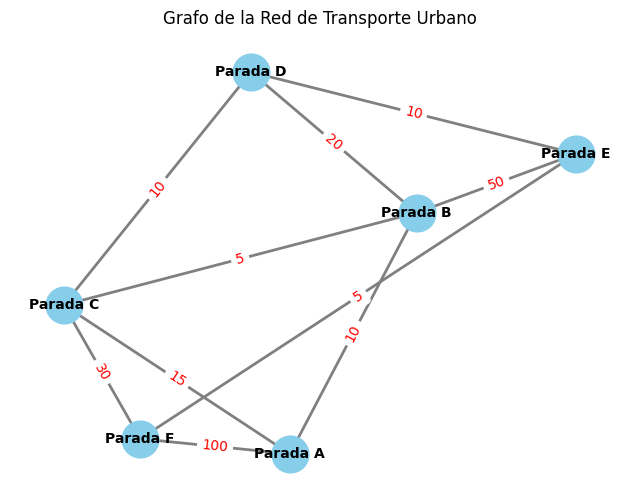

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

paradas = {
    0: "Parada A",
    1: "Parada B",
    2: "Parada C",
    3: "Parada D",
    4: "Parada E",
    5: "Parada F"
}
G.add_nodes_from(paradas.keys())

# Aristas del grafo
conexiones = {
    (0, 1): 10, (0, 2): 15, (1, 2): 5, (1, 3): 20, (2, 3): 10,
    (3, 4): 10, (4, 5): 5, (2, 5): 30, (0, 5): 100, (1, 4): 50
}

for (origen, destino), distancia in conexiones.items():
    G.add_edge(origen, destino, weight=distancia)

# === Dibujar el grafo ===
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue') # -> nodos
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray') # -> aristas

nx.draw_networkx_labels(G, pos, labels=paradas, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Grafo de la Red de Transporte Urbano")
plt.axis('off')
plt.show()